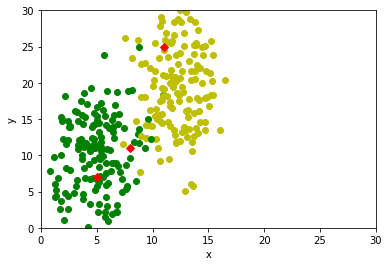

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 300
vector_set = []

for i in xrange(num_points):
    if(i%2 == 0):
        x1 = np.random.normal(0,2) + 5
        x2 = np.random.normal(0,5) + 10
        vector_set.append([x1,x2,0])
        plt.plot(x1,x2,'og')
    else:
        x1 = np.random.normal(0,2) + 12
        x2 = np.random.normal(0,6) + 20
        vector_set.append([x1,x2,1])
        plt.plot(x1,x2,'oy')
        
# x_data is 300x2 matrix, y_data is 300x1 label data
x_data = np.array([ [v[0],v[1]] for v in vector_set ])
y_data = np.array([ [v[2]] for v in vector_set ])

x_val = [[5,7],[8,11],[11,25]]
plt.plot([ row[0] for row in x_val] , [ row[1] for row in x_val] ,'Dr' )

plt.plot()
plt.ylim([0,30])
plt.xlim([0,30])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
import tensorflow as tf

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
y = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(y) + (1 - Y) *
                       tf.log(1 - y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(50001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 5000 == 0:
            print(step, cost_val)
    w_val,b_val = sess.run([W,b])
    
    # predict

    y_val = sess.run(y,feed_dict={X:x_val})

print('W :',w_val)
print(' b:',b_val)
print(x_val,y_val)


(0, 19.825754)
(5000, 0.22364835)
(10000, 0.16019605)
(15000, 0.13554403)
(20000, 0.12232967)
(25000, 0.11405943)
(30000, 0.10838784)
(35000, 0.10425633)
(40000, 0.10111489)
(45000, 0.098648928)
(50000, 0.096664011)
('W :', array([[ 1.01115286],
       [ 0.10678543]], dtype=float32))
(' b:', array([-10.2667923], dtype=float32))
([[5, 7], [8, 11], [11, 25]], array([[ 0.01139038],
       [ 0.2683658 ],
       [ 0.97140539]], dtype=float32))
